In [159]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [160]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [161]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [162]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""
Beginning Data Retrieval     
-----------------------------
""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    city_data = []
    query_url = f'{url}appid={api_key}&q={city}'
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        city_data.append(k_to_f(weather_response["main"]["temp_max"]))   # Append Max Temp
        city_data.append(weather_response["main"]["humidity"])           # Append Hummidity
        city_data.append(weather_response["weather"][0]["description"])  # Append Cloudiness
        city_data.append(weather_response["wind"]["speed"])              # Append Wind Speed
        city_data.append(weather_response["sys"]["country"])             # Append Country
        city_data.append(weather_response["dt"])                         # Append Date
        # Append city data to full data
        results.append(city_data)
    except:
        print(f'Unexpected issue with {city}: {weather_response}')


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 618 | tiksi
Processing Record 2 of 618 | yellowknife
Processing Record 3 of 618 | gohpur
Processing Record 4 of 618 | hobart
Processing Record 5 of 618 | dikson
Processing Record 6 of 618 | aswan
Processing Record 7 of 618 | chuy
Processing Record 8 of 618 | albany
Processing Record 9 of 618 | severo-kurilsk
Processing Record 10 of 618 | port elizabeth
Processing Record 11 of 618 | mataura
Processing Record 12 of 618 | tuktoyaktuk
Processing Record 13 of 618 | haines junction
Processing Record 14 of 618 | rikitea
Processing Record 15 of 618 | tuatapere
Processing Record 16 of 618 | bluff
Processing Record 17 of 618 | atuona
Processing Record 18 of 618 | kapoeta
Processing Record 19 of 618 | norman wells
Processing Record 20 of 618 | camacha
Processing Record 21 of 618 | tautira
Processing Record 22 of 618 | kodiak
Processing Record 23 of 618 | hithadhoo
Processing Record 24 of 618 | butaritari
Processi

Processing Record 193 of 618 | college
Processing Record 194 of 618 | vaitupu
vaitupu not found. Skipping...
Processing Record 195 of 618 | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record 196 of 618 | salina
Processing Record 197 of 618 | narsaq
Processing Record 198 of 618 | andevoranto
andevoranto not found. Skipping...
Processing Record 199 of 618 | fairbanks
Processing Record 200 of 618 | alta floresta
Processing Record 201 of 618 | georgetown
Processing Record 202 of 618 | husavik
Processing Record 203 of 618 | prieska
Processing Record 204 of 618 | dingle
Processing Record 205 of 618 | kruisfontein
Processing Record 206 of 618 | barentsburg
barentsburg not found. Skipping...
Processing Record 207 of 618 | ndago
Processing Record 208 of 618 | oistins
Processing Record 209 of 618 | morgan city
Processing Record 210 of 618 | buchanan
Processing Record 211 of 618 | koshurnikovo
Processing Record 212 of 618 | upernavik
Processing Record 213 of 618 | nakonde
Processing

Processing Record 382 of 618 | nanortalik
Processing Record 383 of 618 | rajshahi
Processing Record 384 of 618 | qui nhon
Processing Record 385 of 618 | kijang
Processing Record 386 of 618 | kamenskoye
kamenskoye not found. Skipping...
Processing Record 387 of 618 | tukrah
Processing Record 388 of 618 | pagudpud
Processing Record 389 of 618 | puerto del rosario
Processing Record 390 of 618 | manyana
Processing Record 391 of 618 | surt
Processing Record 392 of 618 | hobyo
Processing Record 393 of 618 | acapulco
Processing Record 394 of 618 | arman
Processing Record 395 of 618 | ternate
Processing Record 396 of 618 | norrtalje
Processing Record 397 of 618 | lagoa
Processing Record 398 of 618 | bensonville
Processing Record 399 of 618 | panji
Processing Record 400 of 618 | butwal
Processing Record 401 of 618 | pisco
Processing Record 402 of 618 | amapa
Processing Record 403 of 618 | vostok
Processing Record 404 of 618 | katsuura
Processing Record 405 of 618 | kahului
Processing Record 406

bargal not found. Skipping...
Processing Record 578 of 618 | berlevag
Processing Record 579 of 618 | honningsvag
Processing Record 580 of 618 | launceston
Processing Record 581 of 618 | benguela
Processing Record 582 of 618 | tierralta
Processing Record 583 of 618 | santa cruz
Processing Record 584 of 618 | barmer
Processing Record 585 of 618 | quthing
Processing Record 586 of 618 | hiranagar
Processing Record 587 of 618 | nizwa
Processing Record 588 of 618 | blagoyevo
Processing Record 589 of 618 | hay river
Processing Record 590 of 618 | laguna de duero
Processing Record 591 of 618 | balingasay
Processing Record 592 of 618 | carutapera
Processing Record 593 of 618 | sioux lookout
Processing Record 594 of 618 | vnorovy
Processing Record 595 of 618 | anadyr
Processing Record 596 of 618 | nantucket
Processing Record 597 of 618 | kagadi
Processing Record 598 of 618 | lachhmangarh
Processing Record 599 of 618 | sedelnikovo
sedelnikovo not found. Skipping...
Processing Record 600 of 618 | 

In [163]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)

In [164]:
# Export into csv 
df.to_csv(output_data_file, index=False)

# show dataframe 
df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.69,128.87,42.098,88,overcast clouds,1.94,RU,1596140275
1,yellowknife,62.46,-114.35,68.270,59,broken clouds,7.70,CA,1596140372
2,gohpur,26.88,93.63,75.200,95,broken clouds,0.59,IN,1596140372
3,hobart,-42.88,147.33,47.264,70,overcast clouds,3.10,AU,1596139989
4,dikson,73.51,80.55,51.800,80,overcast clouds,2.71,RU,1596140147
...,...,...,...,...,...,...,...,...,...
569,mandurah,-32.55,115.70,52.268,100,broken clouds,3.43,AU,1596140313
570,bereda,43.27,-7.54,80.276,35,clear sky,0.89,ES,1596140346
571,quimper,48.00,-4.10,80.870,36,clear sky,1.09,FR,1596140587
572,solwezi,-12.17,26.39,57.200,54,clear sky,1.25,ZM,1596140588


In [177]:
# Cities with humidity > 100 to remove 
drop_rows = df.loc[df['Humidity'] > 100].index

# Delete these row indexes from dataFrame
cleaned = df.drop(drop_rows, inplace=False)

# # Showing df after dropping rows 
cleaned

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.69,128.87,42.098,88,overcast clouds,1.94,RU,1596140275
1,yellowknife,62.46,-114.35,68.270,59,broken clouds,7.70,CA,1596140372
2,gohpur,26.88,93.63,75.200,95,broken clouds,0.59,IN,1596140372
3,hobart,-42.88,147.33,47.264,70,overcast clouds,3.10,AU,1596139989
4,dikson,73.51,80.55,51.800,80,overcast clouds,2.71,RU,1596140147
...,...,...,...,...,...,...,...,...,...
569,mandurah,-32.55,115.70,52.268,100,broken clouds,3.43,AU,1596140313
570,bereda,43.27,-7.54,80.276,35,clear sky,0.89,ES,1596140346
571,quimper,48.00,-4.10,80.870,36,clear sky,1.09,FR,1596140587
572,solwezi,-12.17,26.39,57.200,54,clear sky,1.25,ZM,1596140588


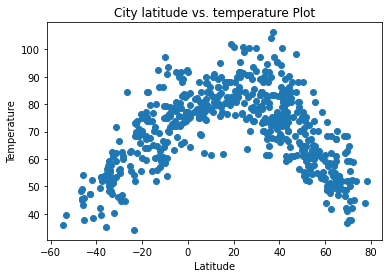

In [178]:
# Generate scatter lopt for Latitude vs. Temperature
lat_temp = cleaned.loc[:,['Lat', 'Max Temp']]

x= lat_temp['Lat']; y = lat_temp['Max Temp'];
plt.scatter(x,y)
plt.title("City latitude vs. temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

In [ ]:
 Latitude vs. Humidity Plot

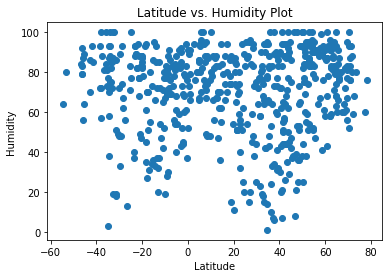

In [186]:
# Generate scatter lopt for  Latitude vs. Humidity Plot
lat_hum = cleaned.loc[:,['Lat', 'Humidity']]

x= lat_hum['Lat']; y = lat_hum['Humidity'];
plt.scatter(x,y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.show()